In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['species'] = pd.Categorical.from_codes(data.target, data.target_names)

# Display the first few rows of the dataset
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target    species  
0 

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


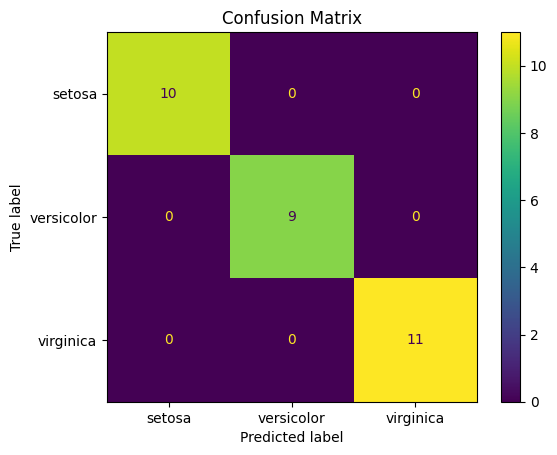

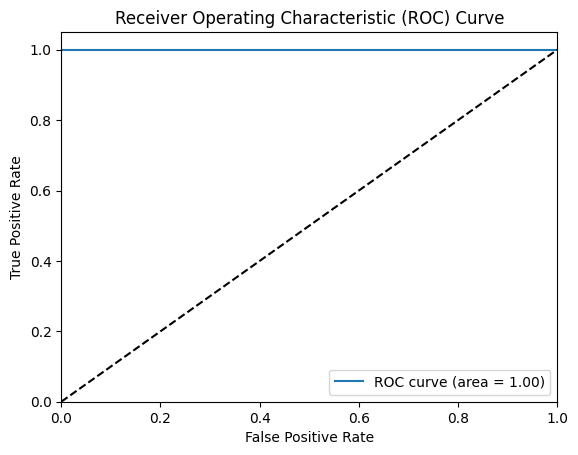

Accuracy: 1.0


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['species'] = pd.Categorical.from_codes(data.target, data.target_names)

# Display the first few rows of the dataset
print(df.head())

X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training dataset
rf_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Get the predicted probabilities for each class
y_pred_prob = rf_classifier.predict_proba(X_test)

# Calculate ROC AUC score for class 1 (you can adjust the class index as needed)
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=data.target_names)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1], pos_label=1)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print Accuracy
print("Accuracy:", accuracy)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  
Accuracy for Fold 1: 0.9666666666666667


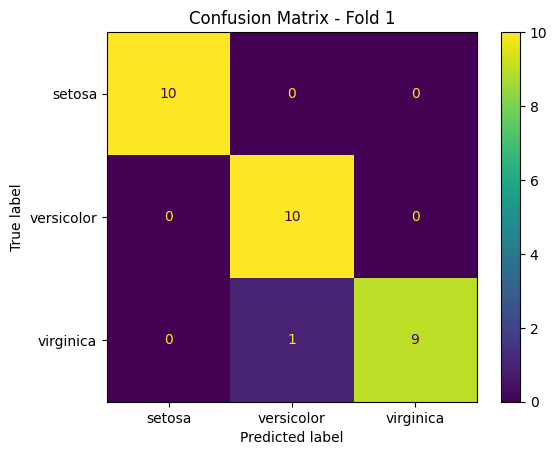

Accuracy for Fold 2: 0.9666666666666667


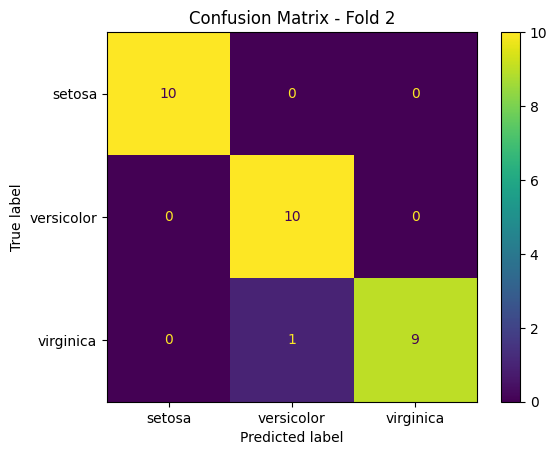

Accuracy for Fold 3: 0.9333333333333333


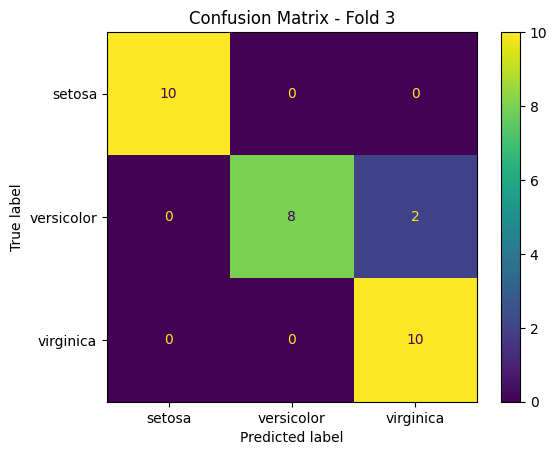

Accuracy for Fold 4: 0.9666666666666667


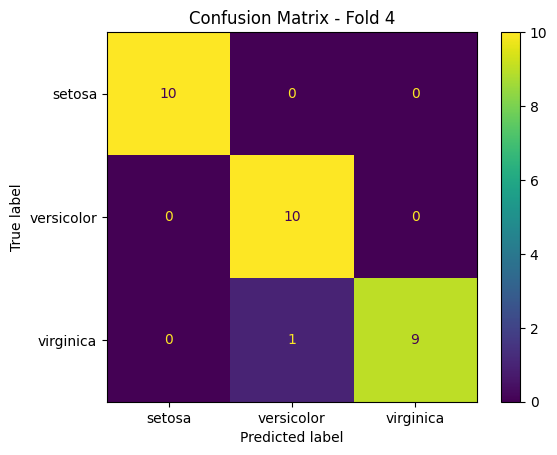

Accuracy for Fold 5: 0.9


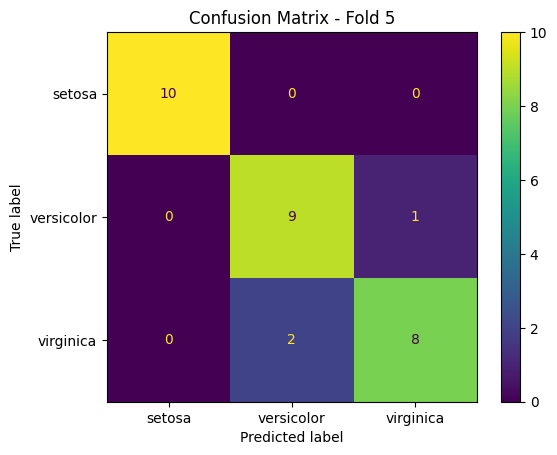


Average Accuracy across 5 Folds: 0.9466666666666667


In [ ]:
#5-fold cross-validation and prints the confusion matrix for each fold
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['species'] = pd.Categorical.from_codes(data.target, data.target_names)

# Display the first few rows of the dataset
print(df.head())

X = data.data
y = data.target

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_accuracies = []
conf_matrices = []

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)

    # Calculate accuracy for the fold
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(fold_accuracy)
    print(f"Accuracy for Fold {fold}: {fold_accuracy}")

    # Calculate confusion matrix for the fold
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append(conf_matrix)

    # Display the confusion matrix for the fold
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=data.target_names)
    disp.plot()
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.show()

# Calculate and print the average accuracy
average_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Accuracy across 5 Folds: {average_accuracy}")

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


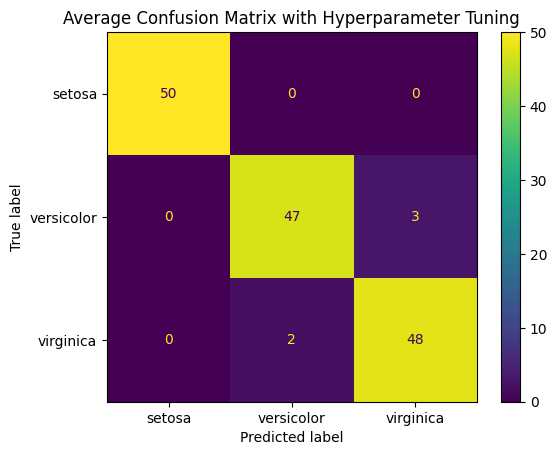

Accuracy across 5-fold cross-validation with Hyperparameter Tuning: 0.9666666666666667
ROC AUC score across 5-fold cross-validation with Hyperparameter Tuning: 0.9953333333333333


In [ ]:
#Hyperparameter tuning using Grid search
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['species'] = pd.Categorical.from_codes(data.target, data.target_names)

# Display the first few rows of the dataset
print(df.head())

X = data.data
y = data.target

# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search to tune hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Perform 5-fold cross-validation with the best model
y_pred_cv = cross_val_predict(best_model, X, y, cv=5)

# Calculate accuracy across all folds
accuracy = accuracy_score(y, y_pred_cv)

# Calculate ROC AUC score across all folds
y_pred_prob_cv = cross_val_predict(best_model, X, y, cv=5, method='predict_proba')
roc_auc = roc_auc_score(y, y_pred_prob_cv, multi_class='ovr')

# Calculate and plot the average confusion matrix
conf_matrix_avg = confusion_matrix(y, y_pred_cv)
disp_avg = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_avg, display_labels=data.target_names)
disp_avg.plot()
plt.title("Average Confusion Matrix with Hyperparameter Tuning")
plt.show()

# Print Accuracy
print("Accuracy across 5-fold cross-validation with Hyperparameter Tuning:", accuracy)

# Print ROC AUC
print("ROC AUC score across 5-fold cross-validation with Hyperparameter Tuning:", roc_auc)

             Feature  Importance
2  petal length (cm)    0.436130
3   petal width (cm)    0.436065
0  sepal length (cm)    0.106128
1   sepal width (cm)    0.021678


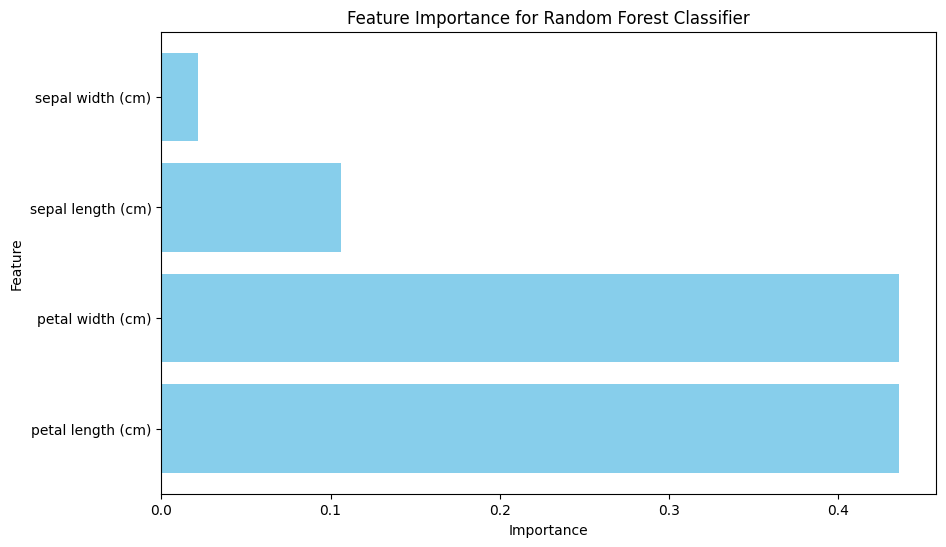

Accuracy of Fold 1: 0.9666666666666667
Accuracy of Fold 2: 0.9666666666666667
Accuracy of Fold 3: 0.9333333333333333
Accuracy of Fold 4: 0.9666666666666667
Accuracy of Fold 5: 1.0
Mean Accuracy across 5 Folds: 0.9666666666666668


In [ ]:
##Find the feature importance and find the accuracy of the Random Forest
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the Random Forest Classifier on the data
rf_classifier.fit(X, y)

# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': feature_importances
})

# Sort features by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(importances_df)

# Visualize the feature importances using a bar chart
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest Classifier')
plt.show()

# Perform 5-fold cross-validation and get the accuracy scores for each fold
accuracy_scores = cross_val_score(rf_classifier, X, y, cv=5)

# Print accuracy of each fold
for fold, accuracy in enumerate(accuracy_scores, 1):
    print(f"Accuracy of Fold {fold}: {accuracy}")

# Calculate and print the mean accuracy
mean_accuracy = np.mean(accuracy_scores)
print(f"Mean Accuracy across 5 Folds: {mean_accuracy}")

In [ ]:
#Modify the code with bagging ensemble method while Random forest is the base model

# Import necessary libraries
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base model
base_model = RandomForestClassifier(random_state=42)

# Define the parameters to search in the grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

# Initialize the Bagging Classifier with the base model
bagging_classifier = BaggingClassifier(base_estimator=base_model, random_state=42)

# Perform Grid Search to find the best parameters
grid_search = GridSearchCV(bagging_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Initialize the Bagging Classifier with the best parameters
best_bagging_classifier = BaggingClassifier(base_estimator=base_model, **best_params, random_state=42)

# Fit the Bagging Classifier on the training data
best_bagging_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_bagging_classifier.predict(X_test)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier as the base estimator
base_classifier = DecisionTreeClassifier()

# Create a Bagging Classifier
bagging_classifier = BaggingClassifier(estimator=base_classifier, random_state=42)

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [5, 10, 15],
    'estimator__max_depth': [2, 3, 4]  # 'base_estimator__' is used to specify parameters of the base estimator
}

# Perform Grid Search to find the best parameters
grid_search = GridSearchCV(bagging_classifier, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_bagging_classifier = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_bagging_classifier.predict(X_test)

# Calculate different evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [ ]:
#Stacking of classifier
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define base estimators for the Stacking Classifier
base_estimators = [
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('dt', DecisionTreeClassifier())
]

# Create a Stacking Classifier
stacking_classifier = StackingClassifier(estimators=base_estimators, final_estimator=RandomForestClassifier())

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    stacking_classifier.fit(X_train, y_train)
    y_pred = stacking_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Print accuracy of each fold
print("Accuracy of each fold:", accuracy_scores)

# Calculate average evaluation metrics
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print average evaluation metrics
print("\nAverage Accuracy: {:.2f}".format(avg_accuracy))
print("Average Precision: {:.2f}".format(avg_precision))
print("Average Recall: {:.2f}".format(avg_recall))
print("Average F1 Score: {:.2f}".format(avg_f1))

Accuracy of each fold: [1.0, 1.0, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]

Average Accuracy: 0.96
Average Precision: 0.97
Average Recall: 0.96
Average F1 Score: 0.96


In [ ]:
#Apply Grid search to find the optimal base model

# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base estimators for the Stacking Classifier
base_estimators = [
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('dt', DecisionTreeClassifier())
]

# Create a Stacking Classifier
stacking_classifier = StackingClassifier(estimators=base_estimators, final_estimator=RandomForestClassifier())

# Define hyperparameters for grid search
# Define hyperparameters for grid search
param_grid = {
    'estimators': [
        [('rf', RandomForestClassifier()), ('gb', GradientBoostingClassifier()), ('dt', DecisionTreeClassifier())],
        [('rf', RandomForestClassifier()), ('dt', DecisionTreeClassifier())]
    ]
}

# Perform Grid Search to find the best base classifier
grid_search = GridSearchCV(stacking_classifier, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best base classifier
best_base_classifier = grid_search.best_estimator_

# Make predictions on the test data using the best base classifier
y_pred = best_base_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the best base classifier
print("Accuracy of the best base classifier: {:.2f}".format(accuracy))
# Print the best base classifier and its parameters
print("Best Base Classifier after Grid Search:")
print(best_base_classifier)
print("\nBest Parameters:")
print(grid_search.best_params_)
print("\nAccuracy of the best base classifier: {:.2f}".format(accuracy))

Accuracy of the best base classifier: 1.00
Best Base Classifier after Grid Search:
StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=RandomForestClassifier())

Best Parameters:
{'estimators': [('rf', RandomForestClassifier()), ('dt', DecisionTreeClassifier())]}

Accuracy of the best base classifier: 1.00
